# Summary Statistics

<a id='top'></a>

<a href=#readdata>Read Data</a>  

<a href=#summary>Summary Statistics</a>

<a href=#end>End</a>


In [1]:
# Ignore 'dask' warning

import pandas as pd
import gcsfs
from google.cloud import storage
from pandas import DataFrame
from IPython.display import HTML
from google.cloud.storage import Blob
import datalab.storage as gcs_datalab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

<a id='readdata'></a>

# Read in data from CSV file

<a href=#top>Top</a>

In [3]:
data_df = pd.read_csv('../Data_Merging/subset_2018.csv')

In [4]:
data_df.columns

Index(['Unnamed: 0', 'date_month', 'id_company', 'id_branch',
       'is_discontinued', 'financial_calamity_outcome', 'qty_employees',
       'year_qty_employees', 'id_company_creditproxy',
       'score_payment_assessment', 'amt_revenue', 'year_revenue',
       'amt_consolidated_revenue', 'year_consolidated_revenue',
       'amt_consolidated_operating_result',
       'year_consolidated_operating_result', 'perc_credit_limit_adjustment',
       'color_credit_status', 'rat_pd', 'score_pd', 'has_increased_risk',
       'is_sole_proprietor', 'code_sbi_2', 'code_sbi_1',
       'qty_address_mutations_total', 'qty_address_mutations_month',
       'has_relocated', 'has_name_change', 'vice_president'],
      dtype='object')

<a id='summary'></a>
# Summary Statistics

<a href=#top>Top</a>

### Overall probability of moving:

In [15]:
data_df.has_relocated.value_counts()

False    1342874
True        5818
Name: has_relocated, dtype: int64

In [16]:
data_df.has_relocated.value_counts() / data_df.shape[0]

False    0.995686
True     0.004314
Name: has_relocated, dtype: float64

In [5]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

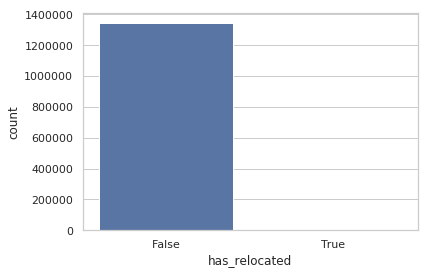

In [9]:
sns.countplot(x='has_relocated', data=data_df)
plt.show()

#### Overall Summary

In [33]:
mult_companies.describe()

,Unnamed: 0,id_company,id_branch,financial_calamity_outcome,qty_employees,year_qty_employees,id_company_creditproxy,score_payment_assessment,amt_revenue,year_revenue,amt_consolidated_revenue,year_consolidated_revenue,amt_consolidated_operating_result,year_consolidated_operating_result,perc_credit_limit_adjustment,score_pd,code_sbi_2,qty_address_mutations_total,qty_address_mutations_month,vice_president
count,1.874300e+05,1.874300e+05,1.874300e+05,187430.000000,187430.000000,187430.000000,1.874300e+05,187430.000000,1.874300e+05,187430.000000,1.874300e+05,187430.000000,1.874300e+05,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000
mean,5.950284e+05,5.223130e+08,4.264306e+07,-0.920706,2503.858939,2017.168468,5.425625e+08,20.461799,3.676628e+03,640.225914,1.206615e-315,454.819613,1.713338e-316,669.012714,15.158086,-3.968880,65.127866,0.711935,0.004439,0.000053
std,5.401649e+05,4.457017e+08,1.891113e+07,0.550941,10570.897467,2.464093,4.436828e+08,1.388161,5.460625e+05,937.116594,0.000000e+00,841.843179,0.000000e+00,948.323280,43.309928,2.118335,20.911874,22.217595,0.066878,0.007304
min,2.600000e+01,1.240000e+02,5.230000e+02,-1.000000,51.000000,2007.000000,1.240000e+02,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-265.000000,-5.973000,0.000000,0.000000,0.000000,0.000000
25%,1.988538e+05,7.486030e+05,2.437885e+07,-1.000000,120.000000,2018.000000,8.068140e+05,20.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,15.000000,-5.031000,47.000000,0.000000,0.000000,0.000000
50%,4.294470e+05,8.911139e+08,4.986267e+07,-1.000000,377.000000,2018.000000,8.930355e+08,20.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,30.000000,-4.956000,69.000000,0.000000,0.000000,0.000000
75%,8.801372e+05,9.028664e+08,5.748237e+07,-1.000000,1426.000000,2018.000000,9.054103e+08,20.000000,7.416645e-317,2008.000000,0.000000e+00,0.000000,5.253943e-319,2011.000000,40.000000,-4.707000,85.000000,0.000000,0.000000,0.000000
max,3.201469e+06,9.435254e+08,7.262691e+07,5.000000,913374.000000,2018.000000,9.435254e+08,29.000000,1.881570e+08,2017.000000,3.197888e-313,2018.000000,1.511693e-313,2018.000000,100.000000,0.000000,99.000000,1578.000000,2.000000,1.000000


### Subset for companies with number of employees > 50

In [6]:
mult_companies = data_df[data_df['qty_employees']>50]

In [7]:
mult_companies.shape

(187430, 29)

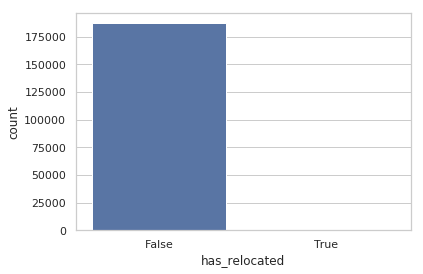

In [8]:
sns.countplot(x='has_relocated', data=mult_companies)
plt.show()

Text(0, 0.5, 'Frequency')

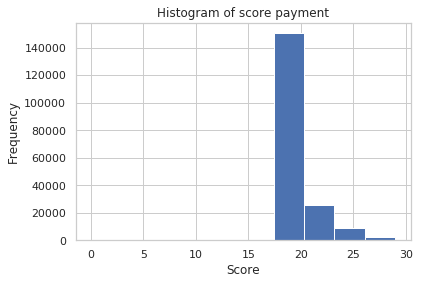

In [10]:
mult_companies.score_payment_assessment.hist()
plt.title('Histogram of score payment')
plt.xlabel('Score')
plt.ylabel('Frequency')

### Inspect Histograms simultaneously

Define columns to view:

In [17]:
feature_cols = ['score_pd', 'score_payment_assessment', 'code_sbi_2']

In [18]:
subset_data = mult_companies[feature_cols]

score_pd
score_payment_assessment
code_sbi_2


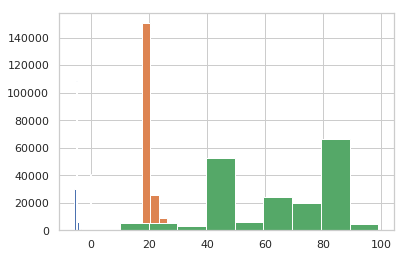

In [19]:
for cols in feature_cols:
    print(cols)
    mult_companies[cols].hist()
#     plt.title('Histogram of', cols)
#     plt.xlabel(cols)
#     plt.ylabel('Frequency')

In [20]:
mult_companies.dtypes

Unnamed: 0                              int64
date_month                             object
id_company                              int64
id_branch                               int64
is_discontinued                          bool
financial_calamity_outcome            float64
qty_employees                           int64
year_qty_employees                      int64
id_company_creditproxy                  int64
score_payment_assessment              float64
amt_revenue                           float64
year_revenue                            int64
amt_consolidated_revenue              float64
year_consolidated_revenue               int64
amt_consolidated_operating_result     float64
year_consolidated_operating_result      int64
perc_credit_limit_adjustment            int64
color_credit_status                    object
rat_pd                                 object
score_pd                              float64
has_increased_risk                       bool
is_sole_proprietor                

In [21]:
feature_cols = ['score_pd', 'score_payment_assessment', 'code_sbi_2', 'qty_employees', 'qty_address_mutations_total']

### Remove qty_address_mutations_total

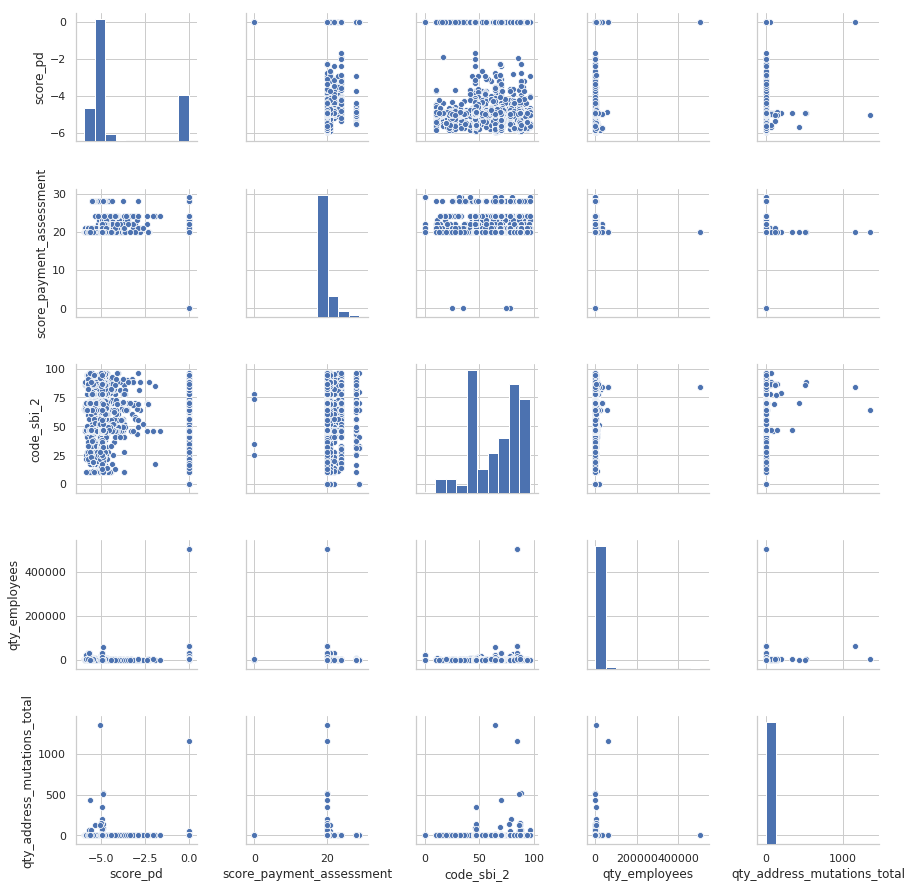

In [22]:
g = sns.pairplot(mult_companies[:10000], vars=feature_cols)

### Select companies with < 10000 employees

In [23]:
subset_large_companies = mult_companies.loc[mult_companies.qty_employees < 10000]

In [24]:
subset_large_companies['qty_employees'].describe()

count    179102.000000
mean       1053.927823
std        1641.206368
min          51.000000
25%         117.000000
50%         349.000000
75%        1200.000000
max        9721.000000
Name: qty_employees, dtype: float64

In [25]:
feature_cols = ['score_pd', 'score_payment_assessment', 'code_sbi_2', 'qty_employees']

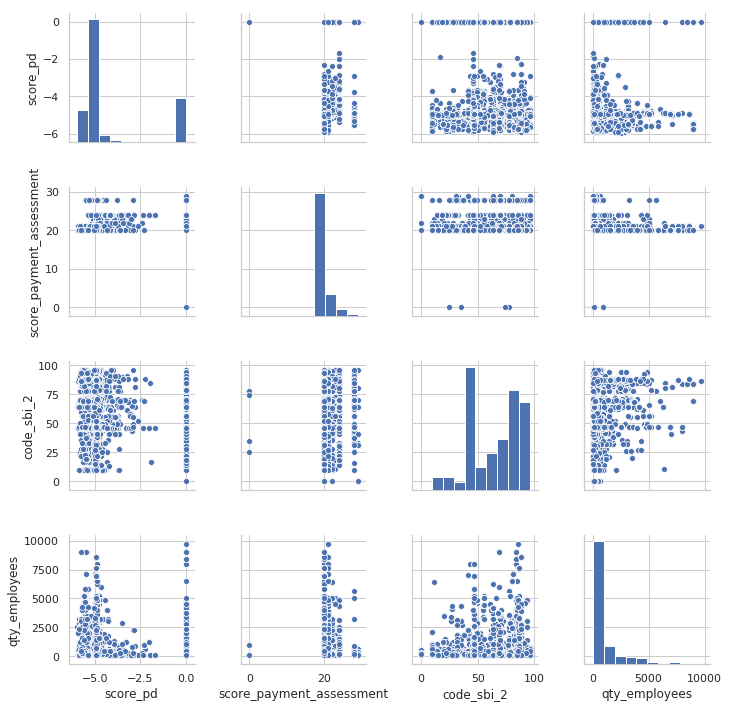

In [26]:
g = sns.pairplot(subset_large_companies[:10000], vars=feature_cols)

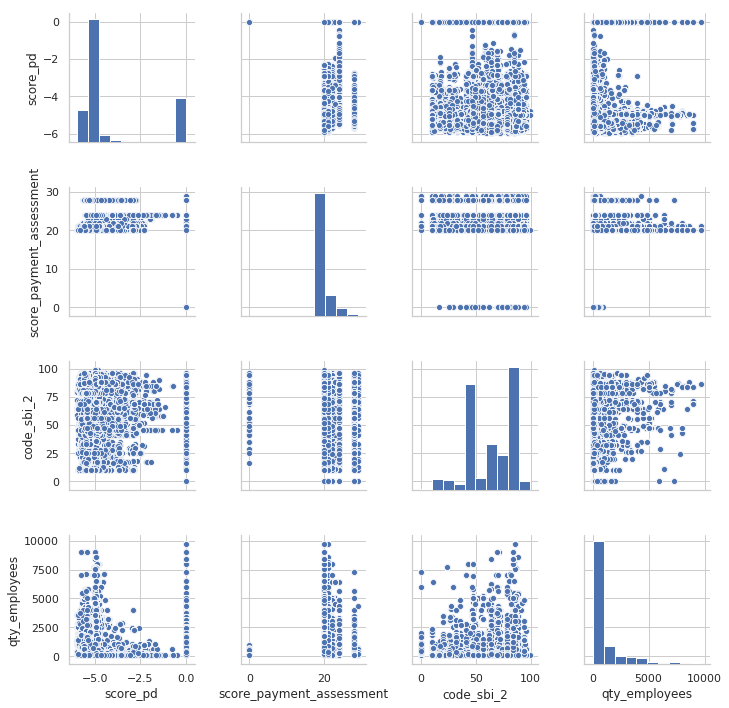

In [43]:
g = sns.pairplot(subset_large_companies, vars=feature_cols)

In [27]:
subset_large_companies.shape

(179102, 29)

In [28]:
subset_large_companies['has_relocated'].value_counts() / subset_large_companies.shape[0]

False    0.998688
True     0.001312
Name: has_relocated, dtype: float64

### Some other Summary Stats:


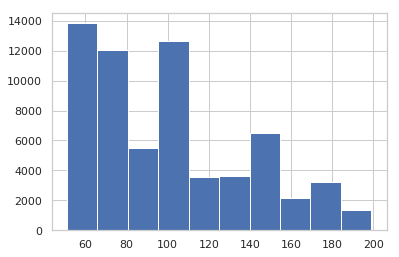

In [30]:
mult_companies.loc[(mult_companies.qty_employees>10) & (mult_companies.qty_employees<200)]['qty_employees'].hist()

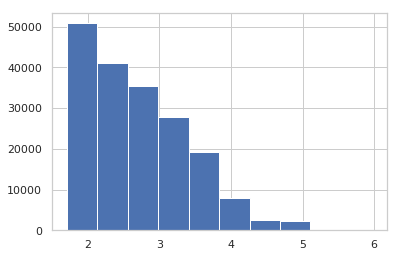

In [31]:
np.log10(mult_companies['qty_employees']).hist()

<a id='end'></a>

<a href=#top>Top</a>

# End